node_value: 10366010907651140116, bit_length: 8
neighbours: [41, 61, 81]
probability is---->> 5.960464477539063e-08


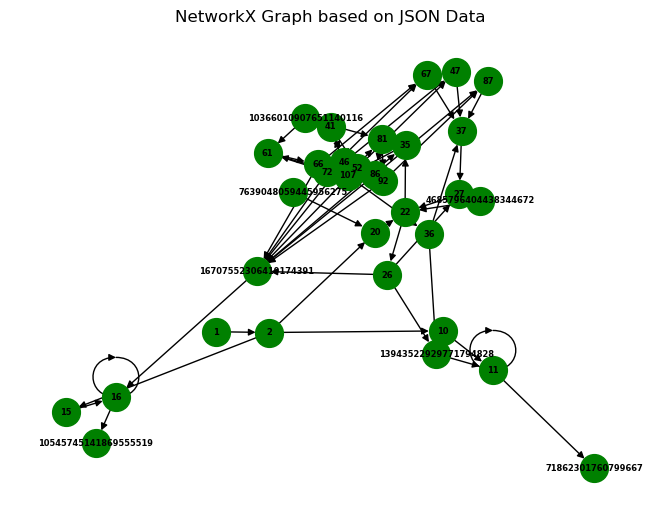

In [2]:
import numpy as np
import pickle
import json
import networkx as nx
import matplotlib.pyplot as plt
# Define a function to compute probability based on certain conditions
def compute(value, variable, file_name, dicts):
    # Initialize a dictionary for checking and storing elements
    check_dict = {}
    
    # Determine the value (input or output) based on the given variable
    if value == True:
        val = "IN"
    else:
        val = "OUT"
    
    # Create the full variable name by combining file_name and variable
    full_variable = file_name + "." + variable
    
    # Initialize lists to store various data
    all_lists = []    # all lists of source code strings
    full_lists = []   #lists of source code strings
    new_lists = []    #cleaned and stripped strings
    
    # Loop through the nodes in the data
    for i in range(len(data['nodes'])):
        # Check if "decl_type" key exists in the node's attributes
        if "decl_type" in data["nodes"][i][1].keys():
            # Check if the "decl_type" matches the desired value (val)
            if data["nodes"][i][1]["decl_type"] == val:
                pass

            # Check if the full_variable is in the hierarchical_path of the node
            if full_variable in data["nodes"][i][1]["hierarchical_path"]:
                node_value, node_info, bit_length = data["nodes"][i][0], data["nodes"][i][1], data["nodes"][i][1]["type"]['bit_width']
                print("node_value: {}, bit_length: {}".format(node_value, bit_length))
                
                # Get the neighbors of this element from the adjacency list
                elements = dicts[node_value]
                
                print("neighbours: {}".format(elements))
                prob = 1
                error = False
                
                # Iterate through the neighbor elements
                for element in elements:
                    for j in range(len(data["nodes"])):
                        if element == data["nodes"][j][0]:
                            # Check if "source_code" key exists in the node's attributes
                            if "source_code" in data["nodes"][j][1].keys():
                                if "source_code" in data["nodes"][j][1].keys():
                                    if " if (" in data["nodes"][j][1]["source_code"]:
                                        all_lists = dicts[element]
                                        
                                        # Extract source code strings, remove whitespace, and strip
                                        for values in all_lists:
                                            for x in range(len(data["nodes"])):
                                                if data["nodes"][x][0] == values:
                                                    original_string = data["nodes"][x][1]["source_code"]
                                                    cleaned_string = original_string.replace(" ", "").strip()
                                                    new_lists.append(cleaned_string)
                                        
                                        # Append cleaned strings to the full_lists
                                        full_lists.append(new_lists)
                                        
                                        # Compare the source code strings
                                        if len(full_lists) > 1:
                                            for i in range(len(full_lists)):
                                                for j in range(i + 1, len(full_lists)):
                                                    set1 = set(full_lists[i])
                                                    set2 = set(full_lists[j])
                                                    is_subset = set1.issubset(set2)
                                                    full_lists.pop(0)
                                        
                                        # Calculate the probability based on conditions
                                        if len(full_lists) == 1 or is_subset == True:
                                            prob *= 1 / (2 ** bit_length)
                                        else:
                                            prob += 1 / (2 ** bit_length)

                                        break
                            break

    return prob
if __name__ == "__main__":

    # Define the path to the JSON file containing the data
    json_file_path = 'lockv0.json'

    # Open and load the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Create an empty dictionary to store adjacency lists
    dicts = {}
    


    # Loop through the edges in the data and create an adjacency list
    for i in range(len(data["edges"])):
        x = data["edges"][i][0][0]
        y = data["edges"][i][0][1]

        # Check if x is not already a key in dicts, if not, create a new entry
        if x not in dicts.keys():
            dicts[x] = [y]
        else:
            # If x is already a key, append y to the existing list
            dicts[x].append(y)
            
    
            
            
    # Call the compute function with specified parameters
    fina_prob=compute(True, "code", "lockv0", dicts)
    print("probability is---->>",fina_prob)
    
    
    
    ##### some cool visualization that I was using yesterday for this task.
    
    G = nx.DiGraph()

    # Add nodes and edges based on the data
    for node in data['nodes']:
        node_id =node[0]
        node_info = node[1]
        G.add_node(node_id, **node_info)

    for edge in data['edges']:
        source= edge[0][0]
        target =edge[0][1]
        G.add_edge(source, target)

    # Plot the graph
    pos =nx.spring_layout(G)  #layout 
    nx.draw(G, pos, with_labels=True,node_size=400, node_color='green',font_size=6,font_color='black', font_weight='bold')
    plt.title('NetworkX Graph based on JSON Data')
    plt.show()
